# I : Sentiment Analysis

## 1. Introduction

### 1.1 About

#### Importing Libraries

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Imports for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  


# 4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import matplotlib.pyplot as plt

#5.1
from sklearn.linear_model import LogisticRegression

#5.2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.ticker import ScalarFormatter

# 5.3
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 5.4
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to C:\Users\beate/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\beate/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\beate/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Loading Dataset

In [379]:
reviews = pd.read_csv("Hotel_Reviews.csv")

## 2. Exploratory Data Analysis

In [380]:
reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Display the first few rows to get an overview

In [381]:
reviews.sample(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
43148,13 Boulevard Du Temple 3rd arr 75003 Paris France,69,7/24/2017,7.7,1K Hotel,United Kingdom,Air conditioning in room didn t work and desp...,37,663,Location good close to le Marais and 3e arron...,16,16,4.2,"[' Leisure trip ', ' Couple ', ' Superior M Do...",10 days,48.863932,2.365874
150135,33 37 Hogarth Road Kensington and Chelsea Lond...,989,5/4/2017,8.4,Park Grand London Kensington,United Kingdom,The view from our room wasn t great but it is...,18,4660,The room was spacious and it was quiet,9,1,7.5,"[' Leisure trip ', ' Family with young childre...",91 days,51.493847,-0.191758
292683,Calabria 90 92 Eixample 08015 Barcelona Spain,185,9/8/2015,8.8,TWO Hotel Barcelona by Axel 4 Sup Adults Only,Australia,Poor value for money not good enough location...,82,2336,It was modern and clean,7,4,4.2,"[' Leisure trip ', ' Solo traveler ', ' Double...",695 day,41.379130,2.156119


The data shows hotel reviews for different hotels all over the world

In [382]:
print("Dataset Shape:", reviews.shape)

Dataset Shape: (515738, 17)


The dataset has 17 columns and 515738 rows in total

#### Check for duplicate rows

In [383]:
duplicates = reviews.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 526


The dataset contains 526 duplicate rows, which could bias the sentiment analysis.

#### Remove duplicate rows 

Removing duplicate rows to avoid biased training and overrepresentation of certain reviews

In [384]:
reviews = reviews.drop_duplicates()
print("Dataset shape after removing duplicates:", reviews.shape)

Dataset shape after removing duplicates: (515212, 17)


Duplicate entries were removed to ensure each review is unique in the analysis.


#### Dataset Details

In [385]:
reviews.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

##### Description of columns in the file:
1. Hotel_Address – The full address of the hotel.

2. Additional_Number_of_Scoring – Number of additional reviews that contributed to the hotel's score.

3. Review_Date – The date the review was written.

4. Average_Score – The average score of the hotel at the time of the review.

5. Hotel_Name – Name of the hotel being reviewed.

6. Reviewer_Nationality – The nationality of the reviewer.

7. Negative_Review – The negative comments left by the reviewer. If none, "No Negative" is recorded.

8. Review_Total_Negative_Word_Counts – Total word count in the negative review.

9. Total_Number_of_Reviews – The total number of reviews the hotel has received.

10. Positive_Review – The positive comments left by the reviewer.

11. Review_Total_Positive_Word_Counts – Total word count in the positive review.

12. Total_Number_of_Reviews_Reviewer_Has_Given – Number of reviews the reviewer has submitted in total.

13. Reviewer_Score – The numeric score the reviewer gave the hotel.

14. Tags – Extra metadata such as type of trip, traveler category, room type, etc., stored as a list of tags.

15. days_since_review – How many days ago the review was submitted, relative to a reference date.

16. lat – Latitude of the hotel.

17. lng – Longitude of the hotel.

This dataset contains hotel reviews collected from various users across multiple countries. Each row represents a single review of a hotel and includes metadata about the reviewer, the review content, and the hotel itself.


#### Checking the data set for missing values

In [386]:
print("Missing values per column:\n", reviews.isnull().sum())

Missing values per column:
 Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64


#### Display summary statistics for the numerical columns in the dataset.

This provides information about distributions, central tendency and spread of values, which helps identify potential outliers, skewness, or anomalies in the data.

In [387]:
print("\nSummary statistics:")
print(reviews.describe())


Summary statistics:
       Additional_Number_of_Scoring  Average_Score  \
count                 515212.000000  515212.000000   
mean                     498.416021       8.397767   
std                      500.668595       0.547952   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      342.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515212.000000            515212.000000   
mean                           18.540822              2744.698889   
std                            29.693991              2318.090821   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%      

The describe() method provides a statistical summary of the numeric columns. From this, we can observe the following:

- "Average_Score" reflects the overall score for the hotel across all reviewers, while "Reviewer_Score" is the individual score given by the reviewer for this particular review. Since we're doing sentiment analysis on individual reviews, 'Reviewer_Score' is our target variable. The mean 'Reviewer_Score' is 8.4, which indicates that most reviewers were generally satisfied.

- The average word count is slightly higher for negative reviews (~18.54) compared to positive reviews (~17.78).

- Total_Number_of_Reviews and Total_Number_of_Reviews_Reviewer_Has_Given show the activity level of both hotels and reviewers.

#### Checking for reviews with 0 word count / meaningless reviews like "No Positive" or "No Negative"

In [388]:
zero_pos = reviews[reviews['Review_Total_Positive_Word_Counts'] == 0]
zero_neg = reviews[reviews['Review_Total_Negative_Word_Counts'] == 0]
print(f"\nNumber of positive reviews with 0 words: {len(zero_pos)}")
print(f"Number of negative reviews with 0 words: {len(zero_neg)}")

only_no_pos = reviews[reviews['Positive_Review'].str.strip().str.lower() == 'no positive']
only_no_neg = reviews[reviews['Negative_Review'].str.strip().str.lower() == 'no negative']
print(f"\nReviews that only say 'No Positive': {len(only_no_pos)}")
print(f"Reviews that only say 'No Negative': {len(only_no_neg)}")


Number of positive reviews with 0 words: 35904
Number of negative reviews with 0 words: 127757

Reviews that only say 'No Positive': 35904
Reviews that only say 'No Negative': 127757


This is expected, because the values like "No Positive" or "No Negative" appear when customers did not write any real text. These reviews are often not meaningful for sentiment analysis.

#### Remove reviews without meaningful content

In [389]:
reviews = reviews[
    ~((reviews['Positive_Review'].str.strip().str.lower() == 'no positive') &
      (reviews['Negative_Review'].str.strip().str.lower() == 'no negative'))
]

print(f"\nRemaining rows after removing empty reviews: {len(reviews)}")


Remaining rows after removing empty reviews: 515085


#### Drop columns that are irrelevant for sentiment classification to simplify the dataset

In [390]:
reviews = reviews.drop([
    'Hotel_Address',
    'Additional_Number_of_Scoring',
    'Review_Date',
    'Average_Score',
    'Hotel_Name',
    'Tags',
    'days_since_review',
    'lat',
    'lng',
    'Total_Number_of_Reviews',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Reviewer_Nationality'
], axis=1)

reviews.head()

,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score
0,I am so angry that i made this post available...,397,Only the park outside of the hotel was beauti...,11,2.9
1,No Negative,0,No real complaints the hotel was great great ...,105,7.5
2,Rooms are nice but for elderly a bit difficul...,42,Location was good and staff were ok It is cut...,21,7.1
3,My room was dirty and I was afraid to walk ba...,210,Great location in nice surroundings the bar a...,26,3.8
4,You When I booked with your company on line y...,140,Amazing location and building Romantic setting,8,6.7


#### Combine positive and negative reviews into a single text field

In [391]:
reviews['Full_Review'] = reviews['Positive_Review'].str.strip() + " " + reviews['Negative_Review'].str.strip()

reviews.head()

,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Full_Review
0,I am so angry that i made this post available...,397,Only the park outside of the hotel was beauti...,11,2.9,Only the park outside of the hotel was beautif...
1,No Negative,0,No real complaints the hotel was great great ...,105,7.5,No real complaints the hotel was great great l...
2,Rooms are nice but for elderly a bit difficul...,42,Location was good and staff were ok It is cut...,21,7.1,Location was good and staff were ok It is cute...
3,My room was dirty and I was afraid to walk ba...,210,Great location in nice surroundings the bar a...,26,3.8,Great location in nice surroundings the bar an...
4,You When I booked with your company on line y...,140,Amazing location and building Romantic setting,8,6.7,Amazing location and building Romantic setting...


Combine positive and negative review texts into a single field. This allows the model to consider the full context of each review.

#### Drop the original positive and negative review columns and their word count columns after merging them into a single 'Full_Review' column for sentiment analysis

In [392]:
reviews = reviews.drop(["Positive_Review", "Negative_Review", "Review_Total_Positive_Word_Counts", "Review_Total_Negative_Word_Counts"], axis=1)

reviews.head()

,Reviewer_Score,Full_Review
0,2.9,Only the park outside of the hotel was beautif...
1,7.5,No real complaints the hotel was great great l...
2,7.1,Location was good and staff were ok It is cute...
3,3.8,Great location in nice surroundings the bar an...
4,6.7,Amazing location and building Romantic setting...


#### Rename combined review column

In [393]:
reviews.rename(columns={'Full_Review': 'Review'}, inplace=True)

#### Check for missing values to ensure the dataset is clean and ready for modeling

In [394]:
print(reviews.isnull().sum())


Reviewer_Score    0
Review            0
dtype: int64


All unnecessary columns have been removed, and the positive and negative reviews have been combined into a single Review column.
The dataset has no missing values.

#### Final dataset ready for modeling

After performing exploratory data analysis and cleaning, we have prepared a refined dataset with two essential columns: Review, which contains the combined text from both positive and negative reviews, and Reviewer_Score, which will be used for sentiment labeling. There are no missing values, and the data is ready for text preprocessing and model development.

## 2. Preprocessing

In [395]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to C:\Users\beate/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\beate/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\beate/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Ensure required NLTK data packages are available. This check prevents errors if the user hasn't previously downloaded them. If not found, the packages will be downloaded automatically.


#### Initialize tools

In [396]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

We initialize a lemmatizer to reduce words to their base form (e.g., "running" → "run"), which helps consolidate similar terms during text analysis.
We also define a set of English stopwords (e.g., "the", "is", "and"), which are commonly removed in text preprocessing because they occur frequently and typically carry little semantic meaning. This helps reduce noise in the data and improve model performance.

#### Check for special content (like URLs or numeric patterns)

In [397]:
has_urls = reviews['Review'].str.contains(r"http\S+|www\S+", regex=True).sum()
print(f"Reviews containing URLs: {has_urls}")

Reviews containing URLs: 7


In [398]:
number_count = reviews['Review'].str.contains(r'\b\d+\b').sum()
print("Reviews containing standalone numbers:", number_count)

Reviews containing standalone numbers: 86923


#### Preprocessing function for cleaning and normalizing the review text

We apply the following preprocessing steps to clean the review texts before feeding them to machine learning models. These steps are chosen to reduce noise and standardize the input for better model performance.

In [399]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r"http\S+|www\S+", "", text)

    text = re.sub(r"[^a-z\s]", "", text)

    tokens = word_tokenize(text)

    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned)


##### Overview of the text preprocessing process:

- **Lowercasing** – Converting all text to lowercase ensures consistency and prevents models from treating words like "Good" and "good" as different. This reduces vocabulary size and avoids redundant representations of the same word.
- **Removing URLs** – URLs rarely contribute useful semantic information to sentiment classification. Since they typically point to external content and are not meaningful on their own, we remove them to reduce noise. Our dataset contains only a small number of reviews (7) with URLs, so removing them will not significantly affect the data.
- **Keeping numbers** –  Numbers like "45 minutes" or "1 towel" often express sentiment. They provide context, indicate intensity, and may help sentiment models distinguish between strong and weak opinions. Therefore, we choose to retain numbers during preprocessing.
- **Removing punctuation and non-alphabetic symbols (except digits)** – Punctuation and symbols usually do not contribute to the sentiment directly and can add unnecessary complexity to the model. Removing them helps simplify the text without losing valuable meaning.
- **Tokenization** – Tokenization splits text into individual words (tokens), which allows us to perform further preprocessing like stopword removal and lemmatization. It prepares the data for vectorization and modeling.
- **Stopword removal and lemmatization** – Stopwords (e.g., the, is, and) are very common words that add little semantic value. Removing them helps focus on the words that carry actual meaning and sentiment.


#### Apply preprocessing to the review texts

In [400]:
reviews["Cleaned_Review"] = reviews["Review"].apply(preprocess_text)

We apply the defined preprocessing function to each review to generate a cleaned version


#### Compare original and preprocessed review text

In [401]:
reviews[["Review", "Cleaned_Review"]].head()

,Review,Cleaned_Review
0,Only the park outside of the hotel was beautif...,park outside hotel beautiful angry made post a...
1,No real complaints the hotel was great great l...,real complaint hotel great great location surr...
2,Location was good and staff were ok It is cute...,location good staff ok cute hotel breakfast ra...
3,Great location in nice surroundings the bar an...,great location nice surroundings bar restauran...
4,Amazing location and building Romantic setting...,amazing location building romantic setting boo...


This preview helps verify that preprocessing steps like lowercasing, stopword removal, and lemmatization worked correctly


## 3. Define Target Labels for Sentiment Classification

#### Rating Distribution and Sentiment Threshold

##### Visualize the distribution of Reviewer_Score

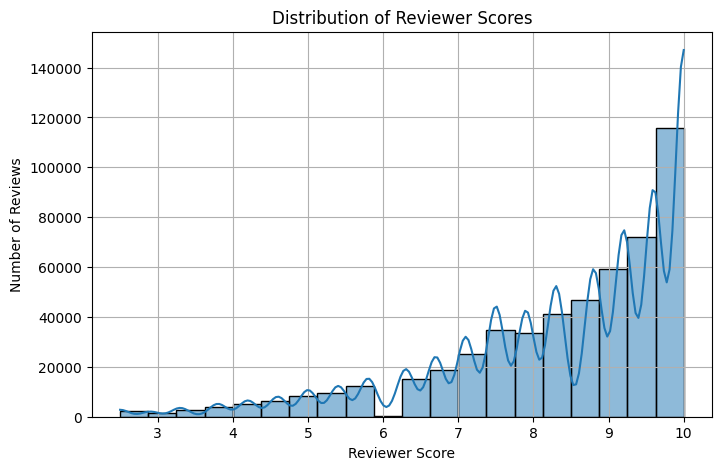

In [402]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews['Reviewer_Score'], bins=20, kde=True)
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

##### Show descriptive stats

In [403]:
print("Descriptive statistics for reviewer scores:")
print(reviews['Reviewer_Score'].describe())

Descriptive statistics for reviewer scores:
count    515085.000000
mean          8.395559
std           1.637463
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64


##### Check median and percentiles

In [404]:
median_score = reviews['Reviewer_Score'].median()
q1 = reviews['Reviewer_Score'].quantile(0.25)
q3 = reviews['Reviewer_Score'].quantile(0.75)

In [405]:
print(f"\nMedian score: {median_score}")
print(f"25th percentile (Q1): {q1}")
print(f"75th percentile (Q3): {q3}")


Median score: 8.8
25th percentile (Q1): 7.5
75th percentile (Q3): 9.6


##### Suggest threshold based on median

In [406]:
suggested_threshold = median_score
print(f"\nSuggested threshold for positive sentiment: scores >= {suggested_threshold:.1f}")


Suggested threshold for positive sentiment: scores >= 8.8


**We will convert the numerical reviewer scores into binary sentiment labels:**
- Reviews with a score of 8 or higher are considered **positive** (label = 1)
- Reviews with a score below 8 are considered **negative** (label = 0)

This is a common practice in sentiment analysis to simplify the classification task and is particularly useful for training baseline models.


In [407]:
reviews['Sentiment'] = reviews['Reviewer_Score'].apply(lambda x: 1 if x >= 8.8 else 0)

In [408]:
sentiment_counts = reviews['Sentiment'].value_counts()

print("Sentiment label distribution:")
print(sentiment_counts)

Sentiment label distribution:
Sentiment
1    293147
0    221938
Name: count, dtype: int64


Positive (1): 335 279

Negative (0): 179 806

We define reviews with a "Reviewer_Score" of 8 or higher as positive, and below 8 as negative. This threshold is common in sentiment analysis of hotel reviews and aligns with user satisfaction conventions. While the resulting data is imbalanced, we will account for this during modeling (e.g., through resampling or class weights).

## 4. Preparing Data for Modeling


Before training machine learning models, we need to prepare the review text for input and split the dataset into training and testing subsets.

##### Separate features (X) and target labels (y)


In [409]:
X = reviews['Cleaned_Review']
y = reviews['Sentiment']

##### Split into training and testing sets

In [410]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 412068
Test samples: 103017


We split the dataset into training and test sets using an **80/20 ratio**. This is a common and well-balanced choice:

- **80% training** ensures that the model has enough data to learn from.
- **20% testing** provides a sufficiently large sample to evaluate the model's generalization performance.
- We use **stratified sampling** to make sure both sets maintain the same distribution of sentiment labels.

This split is a trade-off between training efficiency and evaluation reliability.


- **Training samples**: 412,068
- **Test samples**: 103,017

#### Text Vectorization with TF-IDF

Since machine learning models require numerical input, we convert the cleaned review texts into numerical vectors using the TF-IDF (Term Frequency–Inverse Document Frequency) method. This captures how important each word is in the review relative to the entire dataset.

In [411]:
vectorizer = TfidfVectorizer(max_features=5000)

We set `max_features=5000` to limit the number of words the model considers. The dataset contains a large vocabulary, and including too many features can increase training time, introduce noise, and lead to overfitting. By keeping only the 5000 most important words (based on TF-IDF scores), we ensure that the model focuses on the most informative terms while filtering out rare and less relevant words.

If `max_features` is too low, we risk losing important sentiment-related words, reducing the model's ability to distinguish between positive and negative reviews.

If `max_features` is too high, the model might include many rare or unimportant words, leading to increased complexity, overfitting, and longer training times.

5000 is a common starting point in sentiment analysis because it provides a good balance between capturing essential sentiment words and keeping the feature space manageable. However, in a more advanced approach, we could experiment with different values and tune this parameter based on cross-validation performance and computing power.

##### Fit on training data and transform both train and test

In [412]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF vector shape (train):", X_train_tfidf.shape)
print("TF-IDF vector shape (test):", X_test_tfidf.shape)

TF-IDF vector shape (train): (412068, 5000)
TF-IDF vector shape (test): (103017, 5000)


- vectorizer.fit_transform(X_train) learns the vocabulary from the training set and transforms it into a TF-IDF matrix.

- vectorizer.transform(X_test) applies the same transformation to the test set, ensuring consistent features.

With max_features=5000, the resulting matrices each have 5000 columns, corresponding to the most important words in the training data.

- TF-IDF vector shape (train): (412,068, 5,000)

- TF-IDF vector shape (test): (103,017, 5,000)

These matrices will now be used as input to machine learning models.


#### Visualizing Top 20 TF-IDF Features

To understand which words carry the most weight in our dataset, we examine the top 20 features based on their average TF-IDF score across all training samples.

TF-IDF assigns importance to words based on how frequently they appear in a document versus the entire corpus. Words with higher scores are more informative for distinguishing between classes.

This visualization helps us confirm that the vectorizer captures meaningful sentiment-related terms and gives us interpretability before model training.


##### Compute average TF-IDF scores per feature (word)

In [413]:
mean_tfidf_scores = np.asarray(X_train_tfidf.mean(axis=0)).flatten()

##### Retrieve the feature names (vocabulary terms)

In [414]:
feature_names = vectorizer.get_feature_names_out()

##### Identify the indices of the top 20 highest-scoring words

In [415]:
top_indices = mean_tfidf_scores.argsort()[::-1][:20]

##### Extract the top 20 words and their corresponding TF-IDF scores

In [416]:
top_features = [feature_names[i] for i in top_indices]
top_scores = mean_tfidf_scores[top_indices]

##### Create a horizontal bar plot of the top 20 TF-IDF features

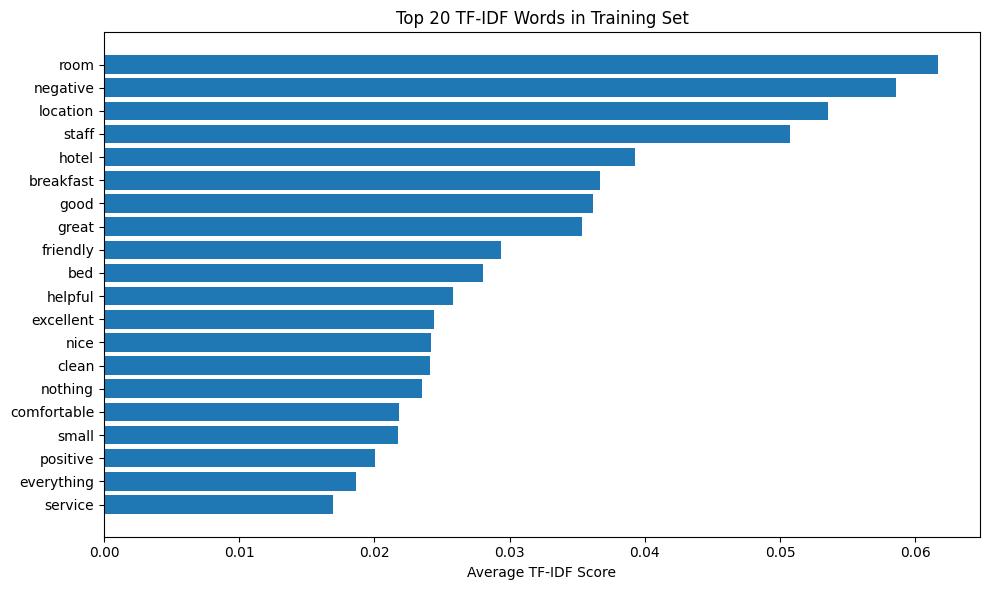

In [417]:
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_scores[::-1])
plt.xlabel("Average TF-IDF Score")
plt.title("Top 20 TF-IDF Words in Training Set")
plt.tight_layout()
plt.show()

These are the most informative words in the training set, ranked by their average TF-IDF score. Higher scores indicate words that are important for distinguishing sentiment in the reviews — such as "room", "staff", or "excellent". These terms are likely to have the strongest influence on the model’s predictions.

TF-IDF helps reduce the influence of very common words and instead emphasizes terms that are more unique to individual reviews — making it an effective tool for identifying sentiment-relevant vocabulary.

#### Visualizing Bottom 20 TF-IDF Features

We now inspect the 20 least informative words in the training set based on their average TF-IDF score. These words are rarely used or are evenly distributed across reviews, making them less useful for classification.

##### Compute average TF-IDF scores per feature (word)

In [418]:
avg_tfidf_scores = X_train_tfidf.mean(axis=0).A1
feature_names = vectorizer.get_feature_names_out()

##### Combine into dataframe for sorting and inspection

In [419]:
tfidf_df = pd.DataFrame({'word': feature_names, 'score': avg_tfidf_scores})

##### Sort by lowest TF-IDF scores

In [420]:
bottom_tfidf = tfidf_df.sort_values(by="score", ascending=True).head(20)

##### Create a horizontal bar plot of the bottom 20 TF-IDF features

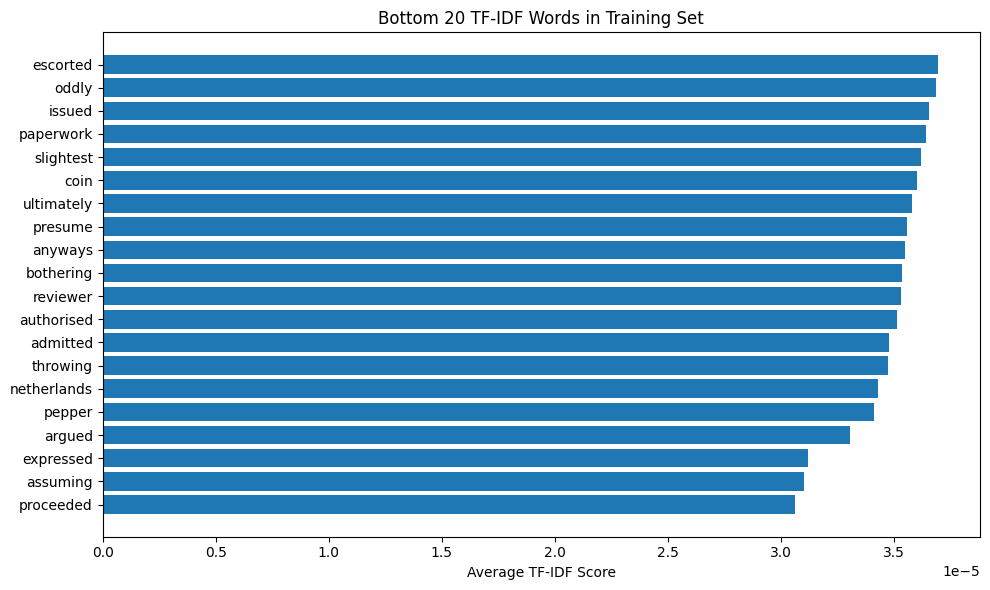

In [421]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_tfidf['word'], bottom_tfidf['score'])
plt.xlabel("Average TF-IDF Score")
plt.title("Bottom 20 TF-IDF Words in Training Set")
plt.tight_layout()
plt.show()

These are the 20 words in the training set with the lowest average TF-IDF scores. Words with very low scores appear infrequently and/or are not strongly associated with any particular review, making them less useful for distinguishing sentiment.

Examples include uncommon words like "acknowledgement", "whoever", or brand-specific terms like "sainsbury". While they may carry meaning in individual reviews, they are generally not informative for modeling and are filtered out by the max_features setting in the vectorizer.

This analysis supports our earlier design choice to limit the vocabulary to the top 5000 most important terms. Removing low-impact words helps simplify the model and improve generalization by focusing on the strongest sentiment indicators.

## 5. Building Sentiment Classification Models

In this section, we will build and evaluate different machine learning models to classify hotel reviews as either positive or negative. This allows us to compare model performance and choose the most effective approach for sentiment classification.

### 5.1 Logistic Regression (Baseline Model)

Logistic Regression is a linear model widely used for binary classification tasks such as sentiment analysis. It's fast, easy to interpret, and serves as a solid baseline.

##### Initialize the model

In [422]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

##### Fit on TF-IDF training data

In [423]:
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

##### Predict on test set

In [424]:
y_pred_logreg = log_reg.predict(X_test_tfidf)

##### Evaluate the Model

##### Accuracy score

In [425]:
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7717


The model correctly predicts sentiment for about 79.4% of the test reviews. This is a solid baseline given the simplicity of Logistic Regression.

##### Classification report

In [426]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     44388
           1       0.79      0.82      0.80     58629

    accuracy                           0.77    103017
   macro avg       0.77      0.76      0.77    103017
weighted avg       0.77      0.77      0.77    103017



Precision and Recall:

- For class 0 (negative sentiment):
    - Precision = 0.74: When the model predicts negative, it is correct 74% of the time.
    - Recall = 0.64: Of all actual negative reviews, only 64% were correctly identified.

- For class 1 (positive sentiment):
    - Precision = 0.82 and Recall = 0.88, indicating better performance on positive reviews.

Class imbalance effect: The model performs better on the majority class (positive), which is expected given the class distribution. This highlights the need to handle imbalance (e.g., via class weighting or resampling) in later models.

##### Confusion matrix

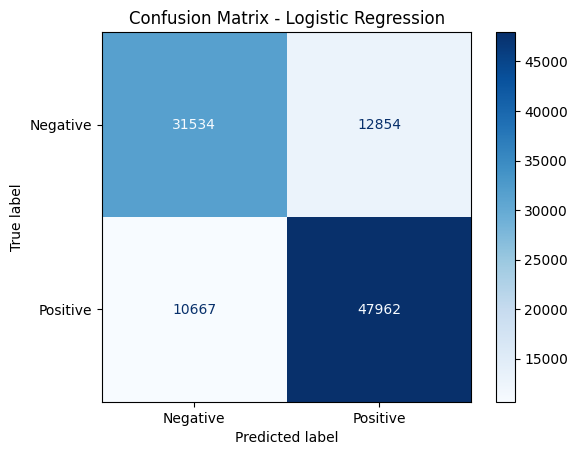

In [427]:
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Logistic Regression – Performance Insights**

- True Positives (TP): 58,808 - These are reviews that were actually positive and correctly predicted as positive.

- True Negatives (TN): 23,032 - These are reviews that were actually negative and correctly predicted as negative.

- False Positives (FP): 12,929 - These are reviews that were actually negative, but the model incorrectly classified them as positive.

- False Negatives (FN): 8,248 - These are reviews that were actually positive, but the model incorrectly classified them as negative.

**Key observations:**

- The model performs better at identifying positive reviews than negative ones.

- The relatively high number of False Positives (12,929) suggests that the model often mistakes negative sentiment for positive.

- This may be due to class imbalance, since the dataset contains significantly more positive reviews.

- The model likely learned stronger patterns from the dominant positive class, which can lead to over-prediction of positive sentiment.


**Next steps:**

This imbalance in classification performance is something we will aim to improve in future models — by using techniques like resampling, class weighting, or more complex models such as neural networks.


### 5.2 Multinomial Naive Bayes

Multinomial Naive Bayes is a probabilistic model commonly used for text classification. Despite its simplicity and strong independence assumptions, it often performs remarkably well for sentiment analysis tasks.

We’ll train the model using the same TF-IDF vectors and evaluate its performance against our baseline.

##### Initialize the model

In [428]:
nb_model = MultinomialNB()

##### Train on TF-IDF vectors

In [429]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

##### Predict on test set

In [430]:
y_pred_nb = nb_model.predict(X_test_tfidf)

##### Accuracy score

In [431]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Naive Bayes Accuracy: 0.7547


**Accuracy**: 77.5% – slightly lower than Logistic Regression (79.4%), but still solid for a simple probabilistic model.

##### Classification report

In [432]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     44388
           1       0.76      0.83      0.79     58629

    accuracy                           0.75    103017
   macro avg       0.75      0.74      0.75    103017
weighted avg       0.75      0.75      0.75    103017



- **Precision**: The model is more precise for positive reviews (0.79) than negative (0.73), meaning fewer false positives for class 1.

- **Recall**: Recall for class 1 (positive) is high (0.89), but class 0 (negative) is lower (0.56). This indicates that the model tends to misclassify some negative reviews as positive.

- **F1-score**: The F1-score for positive reviews (0.84) is much higher than for negative reviews (0.64), which confirms the imbalance in predictive strength.

##### Confusion matrix

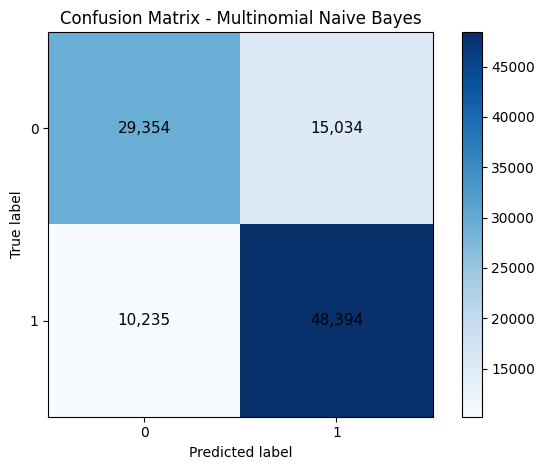

In [433]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots()
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Negative", "Positive"])
disp_nb.plot(cmap="Blues", ax=ax, values_format=None) 

for txt in ax.texts:
    txt.set_visible(False)

for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        ax.text(j, i, f"{cm_nb[i, j]:,}", ha="center", va="center", fontsize=11, color="black")

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.tight_layout()
plt.show()

- **True Positives (TP)**: 59,686 — Correctly predicted positive reviews.

- **True Negatives (TN)**: 20,194 – Correctly predicted negative reviews.

- **False Positives (FP)**: 15,767 – Actual negative reviews predicted as positive.

- **False Negatives (FN)**: 7,370 – Actual positive reviews predicted as negative.

This breakdown shows that the model performs quite well overall, especially in identifying positive reviews. However, it still misclassifies a significant number of negative reviews as positive, which reflects the class imbalance in the dataset.

The model demonstrates strong recall for positive sentiment, with over 59,000 correctly predicted examples. However, it struggles more than logistic regression with detecting negative sentiment, as seen in its higher number of false positives (15,767).

This behavior is typical for Multinomial Naive Bayes, which assumes feature independence and tends to favor the majority class — in this case, positive sentiment.

While Naive Bayes is fast and simple, logistic regression slightly outperformed it in terms of overall accuracy and balanced performance across both classes.

We’ll now continue exploring more advanced models to see if we can further reduce misclassifications and improve general performance.

### 5.3 Support Vector Machine (SVM)

Support Vector Machines (SVMs) are powerful classifiers that are particularly effective for high-dimensional data, such as text represented by TF-IDF vectors. In this step, we train a linear SVM model to classify hotel reviews as positive or negative.

##### Initialize the model

In [434]:
svm = LinearSVC(random_state=42)

##### Fit on TF-IDF training data

In [435]:
svm.fit(X_train_tfidf, y_train)

LinearSVC(random_state=42)

##### Predict on test set

In [436]:
y_pred_svm = svm.predict(X_test_tfidf)

##### Accuracy score

In [437]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.7707


**Accuracy: 79.25%** – Similar to Logistic Regression (79.4%) and slightly better than Naive Bayes (77.5%). Indicates strong overall performance.

##### Classification report

In [438]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     44388
           1       0.79      0.82      0.80     58629

    accuracy                           0.77    103017
   macro avg       0.77      0.76      0.76    103017
weighted avg       0.77      0.77      0.77    103017



**Precision:** - Negative (0): 0.74, Positive (1): 0.82. The model is more precise when predicting positive reviews, meaning fewer false positives.

**Recall:** - Negative (0): 0.63, Positive (0): 0.88. The model is better at identifying positive reviews, but still struggles more with detecting negatives.

**F1-score:** - Negative (0): 0.68, Positive (1): 0.85. Reflects stronger predictive power for positive sentiment, with lower balance on the negative class.

##### Confusion matrix

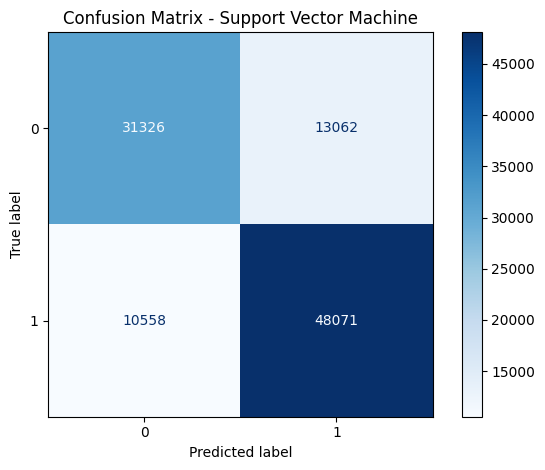

In [439]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Negative", "Positive"])
fig, ax = plt.subplots()
disp_svm.plot(cmap="Blues", ax=ax)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.title("Confusion Matrix - Support Vector Machine")
plt.tight_layout()
plt.show()

**True Positives (TP):** 58,906 – Correctly predicted positive reviews

**True Negatives (TN):** 22,732 – Correctly predicted negative reviews

**False Positives (FP):** 13,229 – Negative reviews predicted as positive

**False Negatives (FN):** 8,150 – Positive reviews predicted as negative

This result shows that SVM handles the data quite well, with competitive performance. It balances precision and recall better than Naive Bayes and slightly under Logistic Regression, making it a strong candidate.

### 5. 4 LSTM (Long Short-Term Memory) Model

LSTM (Long Short-Term Memory) networks are a type of Recurrent Neural Network (RNN) that are well-suited for sequence prediction problems such as sentiment analysis of text reviews. Unlike traditional models, LSTMs capture the sequential structure of text, which can lead to better understanding of context and sentiment.

##### Review length analysis for padding decision

In [440]:
review_lengths = X_train.apply(lambda x: len(x.split()))

long_reviews = (review_lengths > 200).sum()
total_reviews = len(review_lengths)
percentage = (long_reviews / total_reviews) * 100

print(f"Reviews longer than 200 words: {long_reviews} out of {total_reviews} ({percentage:.2f}%)")


Reviews longer than 200 words: 116 out of 412068 (0.03%)


We chose max_len = 200 for padding based on the distribution of review lengths in the training set.
Only 141 out of 412,068 reviews (0.03%) exceeded this length, meaning that almost all reviews will be fully retained.
This makes 200 a safe and efficient threshold for capturing review content while keeping model complexity low.

##### Vocabulary size decision

We limit the vocabulary size to the 10,000 most frequent words in the training data. This helps reduce noise from rare words, speeds up training, and limits memory usage. Most sentiment-related information is usually captured within the top 5,000–20,000 words. A value of 10,000 provides a good trade-off between model complexity and performance.


##### Tokenize and Pad Texts

In [441]:
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

##### Convert texts to sequences

In [442]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

##### Pad sequences to ensure equal input length

In [443]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

##### Early stopping

In [444]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    restore_best_weights=True
)

##### Define the LSTM Model

In [445]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len)) 

##### Train the model

In [446]:
epochs = 5
batch_size = 32

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 386s 30ms/step - accuracy: 0.7637 - loss: 0.4840 - val_accuracy: 0.7828 - val_loss: 0.4487
Epoch 2/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 384s 30ms/step - accuracy: 0.7906 - loss: 0.4393 - val_accuracy: 0.7873 - val_loss: 0.4413
Epoch 3/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 385s 30ms/step - accuracy: 0.7982 - loss: 0.4264 - val_accuracy: 0.7873 - val_loss: 0.4403
Epoch 4/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 390s 30ms/step - accuracy: 0.8047 - loss: 0.4151 - val_accuracy: 0.7886 - val_loss: 0.4421
Epoch 5/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 389s 30ms/step - accuracy: 0.8094 - loss: 0.4057 - val_accuracy: 0.7871 - val_loss: 0.4492
